<a href="https://colab.research.google.com/github/dk-wei/nlp-algo-implementation/blob/main/TF_IDF.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [53]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
import re
from nltk.stem.porter import PorterStemmer

pd.options.display.max_columns = 30
%matplotlib inline

#Analyzing text!

Text analysis has a few parts. We are going to use bag of words analysis, which just treats a sentence like a bag of words - no particular order or anything. It’s simple but it usually gets the job done adequately.

Here is our text.

In [54]:
texts = [
    "Penny bought bright blue fishes.",
    "Penny bought bright blue and orange fish.",
    "The cat ate a fish at the store.",
    "Penny went to the store. Penny ate a bug. Penny saw a fish.",
    "It meowed once at the bug, it is still meowing at the bug and the fish",
    "The cat is at the fish store. The cat is orange. The cat is meowing at the fish.",
    "Penny is a fish"
]

In [55]:
"Penny bought bright blue fishes".split()

['Penny', 'bought', 'bright', 'blue', 'fishes']

## Count Frequency

In [56]:
from sklearn.feature_extraction.text import CountVectorizer
count_vectorizer = CountVectorizer()

In [57]:
# .fit_transfer TOKENIZES and COUNTS
X = count_vectorizer.fit_transform(texts)

In [58]:
X

<7x23 sparse matrix of type '<class 'numpy.int64'>'
	with 49 stored elements in Compressed Sparse Row format>

In [59]:
X.toarray()

array([[0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
        0],
       [1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
        0],
       [0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 0,
        0],
       [0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 3, 1, 0, 1, 1, 1,
        1],
       [1, 2, 0, 0, 0, 0, 2, 0, 1, 0, 1, 2, 1, 1, 1, 0, 0, 0, 1, 0, 3, 0,
        0],
       [0, 2, 0, 0, 0, 0, 0, 3, 2, 0, 3, 0, 0, 1, 0, 1, 0, 0, 0, 1, 5, 0,
        0],
       [0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
        0]])

In [60]:
pd.DataFrame(X.toarray())

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22
0,0,0,0,1,1,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0
1,1,0,0,1,1,1,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0
2,0,1,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,2,0,0
3,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,3,1,0,1,1,1,1
4,1,2,0,0,0,0,2,0,1,0,1,2,1,1,1,0,0,0,1,0,3,0,0
5,0,2,0,0,0,0,0,3,2,0,3,0,0,1,0,1,0,0,0,1,5,0,0
6,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0


In [61]:
# Penny is a fish
# A fish is Penny
count_vectorizer.get_feature_names()

['and',
 'at',
 'ate',
 'blue',
 'bought',
 'bright',
 'bug',
 'cat',
 'fish',
 'fishes',
 'is',
 'it',
 'meowed',
 'meowing',
 'once',
 'orange',
 'penny',
 'saw',
 'still',
 'store',
 'the',
 'to',
 'went']

In [62]:
pd.DataFrame(X.toarray(), columns=count_vectorizer.get_feature_names())

,and,at,ate,blue,bought,bright,bug,cat,fish,fishes,is,it,meowed,meowing,once,orange,penny,saw,still,store,the,to,went
0,0,0,0,1,1,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0
1,1,0,0,1,1,1,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0
2,0,1,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,2,0,0
3,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,3,1,0,1,1,1,1
4,1,2,0,0,0,0,2,0,1,0,1,2,1,1,1,0,0,0,1,0,3,0,0
5,0,2,0,0,0,0,0,3,2,0,3,0,0,1,0,1,0,0,0,1,5,0,0
6,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0


In [63]:
# We'll make a new vectorizer
count_vectorizer = CountVectorizer(stop_words='english')
#count_vectorizer = CountVectorizer(stop_words=['the', 'and'])
# .fit_transfer TOKENIZES and COUNTS
X = count_vectorizer.fit_transform(texts)
print(count_vectorizer.get_feature_names())

['ate', 'blue', 'bought', 'bright', 'bug', 'cat', 'fish', 'fishes', 'meowed', 'meowing', 'orange', 'penny', 'saw', 'store', 'went']


In [64]:
pd.DataFrame(X.toarray(), columns=count_vectorizer.get_feature_names())

,ate,blue,bought,bright,bug,cat,fish,fishes,meowed,meowing,orange,penny,saw,store,went
0,0,1,1,1,0,0,0,1,0,0,0,1,0,0,0
1,0,1,1,1,0,0,1,0,0,0,1,1,0,0,0
2,1,0,0,0,0,1,1,0,0,0,0,0,0,1,0
3,1,0,0,0,1,0,1,0,0,0,0,3,1,1,1
4,0,0,0,0,2,0,1,0,1,1,0,0,0,0,0
5,0,0,0,0,0,3,2,0,0,1,1,0,0,1,0
6,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0


## Stemming/Lemmetiztion

I still see `meowed` and `meowing` and `fish` and `fishes` - they seem the same, so let’s lemmatize/stem them.

In [65]:
# This is what our normal tokenizer looks like
def boring_tokenizer(str_input):
    words = re.sub(r"[^A-Za-z0-9\-]", " ", str_input).lower().split()
    return words

count_vectorizer = CountVectorizer(stop_words='english', tokenizer=boring_tokenizer)
X = count_vectorizer.fit_transform(texts)
print(count_vectorizer.get_feature_names())

['ate', 'blue', 'bought', 'bright', 'bug', 'cat', 'fish', 'fishes', 'meowed', 'meowing', 'orange', 'penny', 'saw', 'store', 'went']


In [66]:
# https://tartarus.org/martin/PorterStemmer/def.txt
from nltk.stem.porter import PorterStemmer
porter_stemmer = PorterStemmer()

print(porter_stemmer.stem('fishes'))
print(porter_stemmer.stem('meowed'))
print(porter_stemmer.stem('oranges'))
print(porter_stemmer.stem('meowing'))
print(porter_stemmer.stem('orange'))
print(porter_stemmer.stem('go'))
print(porter_stemmer.stem('went'))

fish
meow
orang
meow
orang
go
went


In [67]:
porter_stemmer = PorterStemmer()

def stemming_tokenizer(str_input):
    words = re.sub(r"[^A-Za-z0-9\-]", " ", str_input).lower().split()
    words = [porter_stemmer.stem(word) for word in words]
    return words

count_vectorizer = CountVectorizer(stop_words='english', 
                                   tokenizer=stemming_tokenizer
                                   )
X = count_vectorizer.fit_transform(texts)
print(count_vectorizer.get_feature_names())

['ate', 'blue', 'bought', 'bright', 'bug', 'cat', 'fish', 'meow', 'onc', 'orang', 'penni', 'saw', 'store', 'went']


/usr/local/lib/python3.7/dist-packages/sklearn/feature_extraction/text.py:385: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['abov', 'afterward', 'alon', 'alreadi', 'alway', 'ani', 'anoth', 'anyon', 'anyth', 'anywher', 'becam', 'becaus', 'becom', 'befor', 'besid', 'cri', 'describ', 'dure', 'els', 'elsewher', 'empti', 'everi', 'everyon', 'everyth', 'everywher', 'fifti', 'formerli', 'forti', 'ha', 'henc', 'hereaft', 'herebi', 'hi', 'howev', 'hundr', 'inde', 'latterli', 'mani', 'meanwhil', 'moreov', 'mostli', 'nobodi', 'noon', 'noth', 'nowher', 'onc', 'onli', 'otherwis', 'ourselv', 'perhap', 'pleas', 'seriou', 'sever', 'sinc', 'sincer', 'sixti', 'someon', 'someth', 'sometim', 'somewher', 'themselv', 'thenc', 'thereaft', 'therebi', 'therefor', 'thi', 'thu', 'togeth', 'twelv', 'twenti', 'veri', 'wa', 'whatev', 'whenc', 'whenev', 'wherea', 'whereaft', 'wherebi', 'wherev', 'whi', 'yourselv'] not in stop_words.
  'stop_wor

# TF-IDF

TF-IDF? What? It means `term frequency inverse document frequency`! It’s the most important thing. 

## Part One: Term Frequency

In [68]:
pd.DataFrame(X.toarray(), columns=count_vectorizer.get_feature_names())

,ate,blue,bought,bright,bug,cat,fish,meow,onc,orang,penni,saw,store,went
0,0,1,1,1,0,0,1,0,0,0,1,0,0,0
1,0,1,1,1,0,0,1,0,0,1,1,0,0,0
2,1,0,0,0,0,1,1,0,0,0,0,0,1,0
3,1,0,0,0,1,0,1,0,0,0,3,1,1,1
4,0,0,0,0,2,0,1,2,1,0,0,0,0,0
5,0,0,0,0,0,3,2,1,0,1,0,0,1,0
6,0,0,0,0,0,0,1,0,0,0,1,0,0,0


In [69]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [70]:
tfidf_vectorizer = TfidfVectorizer(stop_words='english', 
                                   tokenizer=stemming_tokenizer, 
                                   use_idf=False, 
                                   norm='l1'
                                   )
X = tfidf_vectorizer.fit_transform(texts)
pd.DataFrame(X.toarray(), columns=tfidf_vectorizer.get_feature_names())

/usr/local/lib/python3.7/dist-packages/sklearn/feature_extraction/text.py:385: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['abov', 'afterward', 'alon', 'alreadi', 'alway', 'ani', 'anoth', 'anyon', 'anyth', 'anywher', 'becam', 'becaus', 'becom', 'befor', 'besid', 'cri', 'describ', 'dure', 'els', 'elsewher', 'empti', 'everi', 'everyon', 'everyth', 'everywher', 'fifti', 'formerli', 'forti', 'ha', 'henc', 'hereaft', 'herebi', 'hi', 'howev', 'hundr', 'inde', 'latterli', 'mani', 'meanwhil', 'moreov', 'mostli', 'nobodi', 'noon', 'noth', 'nowher', 'onc', 'onli', 'otherwis', 'ourselv', 'perhap', 'pleas', 'seriou', 'sever', 'sinc', 'sincer', 'sixti', 'someon', 'someth', 'sometim', 'somewher', 'themselv', 'thenc', 'thereaft', 'therebi', 'therefor', 'thi', 'thu', 'togeth', 'twelv', 'twenti', 'veri', 'wa', 'whatev', 'whenc', 'whenev', 'wherea', 'whereaft', 'wherebi', 'wherev', 'whi', 'yourselv'] not in stop_words.
  'stop_wor

,ate,blue,bought,bright,bug,cat,fish,meow,onc,orang,penni,saw,store,went
0,0.000000,0.200000,0.200000,0.200000,0.000000,0.000,0.200000,0.000000,0.000000,0.000000,0.200000,0.000000,0.000000,0.000000
1,0.000000,0.166667,0.166667,0.166667,0.000000,0.000,0.166667,0.000000,0.000000,0.166667,0.166667,0.000000,0.000000,0.000000
2,0.250000,0.000000,0.000000,0.000000,0.000000,0.250,0.250000,0.000000,0.000000,0.000000,0.000000,0.000000,0.250000,0.000000
3,0.111111,0.000000,0.000000,0.000000,0.111111,0.000,0.111111,0.000000,0.000000,0.000000,0.333333,0.111111,0.111111,0.111111
4,0.000000,0.000000,0.000000,0.000000,0.333333,0.000,0.166667,0.333333,0.166667,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.000000,0.000000,0.000000,0.000000,0.000000,0.375,0.250000,0.125000,0.000000,0.125000,0.000000,0.000000,0.125000,0.000000
6,0.000000,0.000000,0.000000,0.000000,0.000000,0.000,0.500000,0.000000,0.000000,0.000000,0.500000,0.000000,0.000000,0.000000


Now our numbers have shifted a little bit. Instead of just being a count, it’s the percentage of the words.

> value = (number of times word appears in sentence) / (number of words in sentence)

After we remove the stopwords, the term fish is 50% of the words in Penny is a fish vs. 37.5% in It meowed once at the fish, it is still meowing at the fish. It meowed at the bug and the fish.

So now when we search we’ll get **more relevant results** because it takes into account whether half of our words are fish or 1% of millions upon millions of words is fish. But we aren’t done yet!

## Part Two: Inverse document frequency

This is inverse term frequency - the more often a term shows up across all documents, the less important it is in our matrix.

In [71]:
tfidf_vectorizer = TfidfVectorizer(stop_words='english', tokenizer=stemming_tokenizer, use_idf=False, norm='l1')
X = tfidf_vectorizer.fit_transform(texts)
df = pd.DataFrame(X.toarray(), columns=tfidf_vectorizer.get_feature_names())
df

/usr/local/lib/python3.7/dist-packages/sklearn/feature_extraction/text.py:385: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['abov', 'afterward', 'alon', 'alreadi', 'alway', 'ani', 'anoth', 'anyon', 'anyth', 'anywher', 'becam', 'becaus', 'becom', 'befor', 'besid', 'cri', 'describ', 'dure', 'els', 'elsewher', 'empti', 'everi', 'everyon', 'everyth', 'everywher', 'fifti', 'formerli', 'forti', 'ha', 'henc', 'hereaft', 'herebi', 'hi', 'howev', 'hundr', 'inde', 'latterli', 'mani', 'meanwhil', 'moreov', 'mostli', 'nobodi', 'noon', 'noth', 'nowher', 'onc', 'onli', 'otherwis', 'ourselv', 'perhap', 'pleas', 'seriou', 'sever', 'sinc', 'sincer', 'sixti', 'someon', 'someth', 'sometim', 'somewher', 'themselv', 'thenc', 'thereaft', 'therebi', 'therefor', 'thi', 'thu', 'togeth', 'twelv', 'twenti', 'veri', 'wa', 'whatev', 'whenc', 'whenev', 'wherea', 'whereaft', 'wherebi', 'wherev', 'whi', 'yourselv'] not in stop_words.
  'stop_wor

,ate,blue,bought,bright,bug,cat,fish,meow,onc,orang,penni,saw,store,went
0,0.000000,0.200000,0.200000,0.200000,0.000000,0.000,0.200000,0.000000,0.000000,0.000000,0.200000,0.000000,0.000000,0.000000
1,0.000000,0.166667,0.166667,0.166667,0.000000,0.000,0.166667,0.000000,0.000000,0.166667,0.166667,0.000000,0.000000,0.000000
2,0.250000,0.000000,0.000000,0.000000,0.000000,0.250,0.250000,0.000000,0.000000,0.000000,0.000000,0.000000,0.250000,0.000000
3,0.111111,0.000000,0.000000,0.000000,0.111111,0.000,0.111111,0.000000,0.000000,0.000000,0.333333,0.111111,0.111111,0.111111
4,0.000000,0.000000,0.000000,0.000000,0.333333,0.000,0.166667,0.333333,0.166667,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.000000,0.000000,0.000000,0.000000,0.000000,0.375,0.250000,0.125000,0.000000,0.125000,0.000000,0.000000,0.125000,0.000000
6,0.000000,0.000000,0.000000,0.000000,0.000000,0.000,0.500000,0.000000,0.000000,0.000000,0.500000,0.000000,0.000000,0.000000


In [72]:
# Just add the columns together
pd.DataFrame([df['fish'], df['meow'], df['fish'] + df['meow']], index=["fish", "meow", "fish + meow"]).T

,fish,meow,fish + meow
0,0.200000,0.000000,0.200000
1,0.166667,0.000000,0.166667
2,0.250000,0.000000,0.250000
3,0.111111,0.000000,0.111111
4,0.166667,0.333333,0.500000
5,0.250000,0.125000,0.375000
6,0.500000,0.000000,0.500000


In [73]:
# use_idf=True is default, but I'll leave it in
idf_vectorizer = TfidfVectorizer(stop_words='english', tokenizer=stemming_tokenizer, use_idf=True, norm='l1')
X = idf_vectorizer.fit_transform(texts)
idf_df = pd.DataFrame(X.toarray(), columns=idf_vectorizer.get_feature_names())
idf_df

/usr/local/lib/python3.7/dist-packages/sklearn/feature_extraction/text.py:385: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['abov', 'afterward', 'alon', 'alreadi', 'alway', 'ani', 'anoth', 'anyon', 'anyth', 'anywher', 'becam', 'becaus', 'becom', 'befor', 'besid', 'cri', 'describ', 'dure', 'els', 'elsewher', 'empti', 'everi', 'everyon', 'everyth', 'everywher', 'fifti', 'formerli', 'forti', 'ha', 'henc', 'hereaft', 'herebi', 'hi', 'howev', 'hundr', 'inde', 'latterli', 'mani', 'meanwhil', 'moreov', 'mostli', 'nobodi', 'noon', 'noth', 'nowher', 'onc', 'onli', 'otherwis', 'ourselv', 'perhap', 'pleas', 'seriou', 'sever', 'sinc', 'sincer', 'sixti', 'someon', 'someth', 'sometim', 'somewher', 'themselv', 'thenc', 'thereaft', 'therebi', 'therefor', 'thi', 'thu', 'togeth', 'twelv', 'twenti', 'veri', 'wa', 'whatev', 'whenc', 'whenev', 'wherea', 'whereaft', 'wherebi', 'wherev', 'whi', 'yourselv'] not in stop_words.
  'stop_wor

,ate,blue,bought,bright,bug,cat,fish,meow,onc,orang,penni,saw,store,went
0,0.000000,0.235463,0.235463,0.235463,0.000000,0.000000,0.118871,0.000000,0.000000,0.000000,0.174741,0.000000,0.000000,0.000000
1,0.000000,0.190587,0.190587,0.190587,0.000000,0.000000,0.096216,0.000000,0.000000,0.190587,0.141437,0.000000,0.000000,0.000000
2,0.297654,0.000000,0.000000,0.000000,0.000000,0.297654,0.150267,0.000000,0.000000,0.000000,0.000000,0.000000,0.254425,0.000000
3,0.125073,0.000000,0.000000,0.000000,0.125073,0.000000,0.063142,0.000000,0.000000,0.000000,0.278455,0.150675,0.106908,0.150675
4,0.000000,0.000000,0.000000,0.000000,0.350291,0.000000,0.088420,0.350291,0.210997,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.000000,0.000000,0.000000,0.000000,0.000000,0.437035,0.147088,0.145678,0.000000,0.145678,0.000000,0.000000,0.124521,0.000000
6,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.404858,0.000000,0.000000,0.000000,0.595142,0.000000,0.000000,0.000000


In [74]:
# OLD dataframe
pd.DataFrame([df['fish'], df['meow'], df['fish'] + df['meow']], index=["fish", "meow", "fish + meow"]).T

,fish,meow,fish + meow
0,0.200000,0.000000,0.200000
1,0.166667,0.000000,0.166667
2,0.250000,0.000000,0.250000
3,0.111111,0.000000,0.111111
4,0.166667,0.333333,0.500000
5,0.250000,0.125000,0.375000
6,0.500000,0.000000,0.500000


In [75]:
# NEW dataframe
pd.DataFrame([idf_df['fish'], idf_df['meow'], idf_df['fish'] + idf_df['meow']], index=["fish", "meow", "fish + meow"]).T

,fish,meow,fish + meow
0,0.118871,0.000000,0.118871
1,0.096216,0.000000,0.096216
2,0.150267,0.000000,0.150267
3,0.063142,0.000000,0.063142
4,0.088420,0.350291,0.438712
5,0.147088,0.145678,0.292766
6,0.404858,0.000000,0.404858


In [76]:
# use_idf=True is default, but I'll leave it in
l2_vectorizer = TfidfVectorizer(stop_words='english', tokenizer=stemming_tokenizer, use_idf=True)
X = l2_vectorizer.fit_transform(texts)
l2_df = pd.DataFrame(X.toarray(), columns=l2_vectorizer.get_feature_names())
l2_df

/usr/local/lib/python3.7/dist-packages/sklearn/feature_extraction/text.py:385: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['abov', 'afterward', 'alon', 'alreadi', 'alway', 'ani', 'anoth', 'anyon', 'anyth', 'anywher', 'becam', 'becaus', 'becom', 'befor', 'besid', 'cri', 'describ', 'dure', 'els', 'elsewher', 'empti', 'everi', 'everyon', 'everyth', 'everywher', 'fifti', 'formerli', 'forti', 'ha', 'henc', 'hereaft', 'herebi', 'hi', 'howev', 'hundr', 'inde', 'latterli', 'mani', 'meanwhil', 'moreov', 'mostli', 'nobodi', 'noon', 'noth', 'nowher', 'onc', 'onli', 'otherwis', 'ourselv', 'perhap', 'pleas', 'seriou', 'sever', 'sinc', 'sincer', 'sixti', 'someon', 'someth', 'sometim', 'somewher', 'themselv', 'thenc', 'thereaft', 'therebi', 'therefor', 'thi', 'thu', 'togeth', 'twelv', 'twenti', 'veri', 'wa', 'whatev', 'whenc', 'whenev', 'wherea', 'whereaft', 'wherebi', 'wherev', 'whi', 'yourselv'] not in stop_words.
  'stop_wor

,ate,blue,bought,bright,bug,cat,fish,meow,onc,orang,penni,saw,store,went
0,0.000000,0.512612,0.512612,0.512612,0.000000,0.000000,0.258786,0.000000,0.000000,0.000000,0.380417,0.000000,0.000000,0.000000
1,0.000000,0.456170,0.456170,0.456170,0.000000,0.000000,0.230292,0.000000,0.000000,0.456170,0.338530,0.000000,0.000000,0.000000
2,0.578752,0.000000,0.000000,0.000000,0.000000,0.578752,0.292176,0.000000,0.000000,0.000000,0.000000,0.000000,0.494698,0.000000
3,0.303663,0.000000,0.000000,0.000000,0.303663,0.000000,0.153301,0.000000,0.000000,0.000000,0.676058,0.365821,0.259561,0.365821
4,0.000000,0.000000,0.000000,0.000000,0.641958,0.000000,0.162043,0.641958,0.386682,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.000000,0.000000,0.000000,0.000000,0.000000,0.840166,0.282766,0.280055,0.000000,0.280055,0.000000,0.000000,0.239382,0.000000
6,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.562463,0.000000,0.000000,0.000000,0.826823,0.000000,0.000000,0.000000


In [77]:
# normal TF-IDF dataframe
pd.DataFrame([idf_df['fish'], idf_df['meow'], idf_df['fish'] + idf_df['meow']], index=["fish", "meow", "fish + meow"]).T

,fish,meow,fish + meow
0,0.118871,0.000000,0.118871
1,0.096216,0.000000,0.096216
2,0.150267,0.000000,0.150267
3,0.063142,0.000000,0.063142
4,0.088420,0.350291,0.438712
5,0.147088,0.145678,0.292766
6,0.404858,0.000000,0.404858


In [78]:
# L2 norm TF-IDF dataframe
pd.DataFrame([l2_df['fish'], l2_df['meow'], l2_df['fish'] + l2_df['meow']], index=["fish", "meow", "fish + meow"]).T

,fish,meow,fish + meow
0,0.258786,0.000000,0.258786
1,0.230292,0.000000,0.230292
2,0.292176,0.000000,0.292176
3,0.153301,0.000000,0.153301
4,0.162043,0.641958,0.804000
5,0.282766,0.280055,0.562821
6,0.562463,0.000000,0.562463


# Who cares? Why do we need to know this?

When someone dumps 100,000 documents on your desk in response to FOIA, you’ll start to care! 

One of the reasons understanding TF-IDF is important is because of **document similarity**. By knowing what documents are similar you’re able to find related documents and automatically group documents into clusters.

TFIDF用来寻找similar documents，对大量的文件进行归类，这样的任务现在bert也是做的风生水起。

## 2 categories of documents

In [79]:
# Initialize a vectorizer
vectorizer = TfidfVectorizer(use_idf=True, tokenizer=stemming_tokenizer, stop_words='english')
X = vectorizer.fit_transform(texts)

/usr/local/lib/python3.7/dist-packages/sklearn/feature_extraction/text.py:385: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['abov', 'afterward', 'alon', 'alreadi', 'alway', 'ani', 'anoth', 'anyon', 'anyth', 'anywher', 'becam', 'becaus', 'becom', 'befor', 'besid', 'cri', 'describ', 'dure', 'els', 'elsewher', 'empti', 'everi', 'everyon', 'everyth', 'everywher', 'fifti', 'formerli', 'forti', 'ha', 'henc', 'hereaft', 'herebi', 'hi', 'howev', 'hundr', 'inde', 'latterli', 'mani', 'meanwhil', 'moreov', 'mostli', 'nobodi', 'noon', 'noth', 'nowher', 'onc', 'onli', 'otherwis', 'ourselv', 'perhap', 'pleas', 'seriou', 'sever', 'sinc', 'sincer', 'sixti', 'someon', 'someth', 'sometim', 'somewher', 'themselv', 'thenc', 'thereaft', 'therebi', 'therefor', 'thi', 'thu', 'togeth', 'twelv', 'twenti', 'veri', 'wa', 'whatev', 'whenc', 'whenev', 'wherea', 'whereaft', 'wherebi', 'wherev', 'whi', 'yourselv'] not in stop_words.
  'stop_wor

In [80]:
X

<7x14 sparse matrix of type '<class 'numpy.float64'>'
	with 33 stored elements in Compressed Sparse Row format>

In [81]:
pd.DataFrame(X.toarray())

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,0.000000,0.512612,0.512612,0.512612,0.000000,0.000000,0.258786,0.000000,0.000000,0.000000,0.380417,0.000000,0.000000,0.000000
1,0.000000,0.456170,0.456170,0.456170,0.000000,0.000000,0.230292,0.000000,0.000000,0.456170,0.338530,0.000000,0.000000,0.000000
2,0.578752,0.000000,0.000000,0.000000,0.000000,0.578752,0.292176,0.000000,0.000000,0.000000,0.000000,0.000000,0.494698,0.000000
3,0.303663,0.000000,0.000000,0.000000,0.303663,0.000000,0.153301,0.000000,0.000000,0.000000,0.676058,0.365821,0.259561,0.365821
4,0.000000,0.000000,0.000000,0.000000,0.641958,0.000000,0.162043,0.641958,0.386682,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.000000,0.000000,0.000000,0.000000,0.000000,0.840166,0.282766,0.280055,0.000000,0.280055,0.000000,0.000000,0.239382,0.000000
6,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.562463,0.000000,0.000000,0.000000,0.826823,0.000000,0.000000,0.000000


In [82]:
# KMeans clustering is a method of clustering.
from sklearn.cluster import KMeans

number_of_clusters = 2
km = KMeans(n_clusters=number_of_clusters)
km.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [83]:
print("Top terms per cluster:")
order_centroids = km.cluster_centers_.argsort()[:, ::-1]
terms = vectorizer.get_feature_names()
for i in range(number_of_clusters):
    top_ten_words = [terms[ind] for ind in order_centroids[i, :5]]
    print("Cluster {}: {}".format(i, ' '.join(top_ten_words)))

Top terms per cluster:
Cluster 0: cat meow fish store bug
Cluster 1: penni fish bright bought blue


In [84]:
km.labels_

array([1, 1, 0, 1, 0, 0, 1], dtype=int32)

In [85]:
texts

['Penny bought bright blue fishes.',
 'Penny bought bright blue and orange fish.',
 'The cat ate a fish at the store.',
 'Penny went to the store. Penny ate a bug. Penny saw a fish.',
 'It meowed once at the bug, it is still meowing at the bug and the fish',
 'The cat is at the fish store. The cat is orange. The cat is meowing at the fish.',
 'Penny is a fish']

In [86]:
results = pd.DataFrame()
results['text'] = texts
results['category'] = km.labels_
results

,text,category
0,Penny bought bright blue fishes.,1
1,Penny bought bright blue and orange fish.,1
2,The cat ate a fish at the store.,0
3,Penny went to the store. Penny ate a bug. Penn...,1
4,"It meowed once at the bug, it is still meowing...",0
5,The cat is at the fish store. The cat is orang...,0
6,Penny is a fish,1


## 4 categories of documents

In [87]:
from sklearn.cluster import KMeans

number_of_clusters = 3
km = KMeans(n_clusters=number_of_clusters)
km.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [88]:
print("Top terms per cluster:")
order_centroids = km.cluster_centers_.argsort()[:, ::-1]
terms = vectorizer.get_feature_names()
for i in range(number_of_clusters):
    top_ten_words = [terms[ind] for ind in order_centroids[i, :5]]
    print("Cluster {}: {}".format(i, ' '.join(top_ten_words)))

Top terms per cluster:
Cluster 0: cat store ate fish orang
Cluster 1: penni bug fish meow onc
Cluster 2: bright bought blue penni fish


In [89]:
results = pd.DataFrame()
results['text'] = texts
results['category'] = km.labels_
results

,text,category
0,Penny bought bright blue fishes.,2
1,Penny bought bright blue and orange fish.,2
2,The cat ate a fish at the store.,0
3,Penny went to the store. Penny ate a bug. Penn...,1
4,"It meowed once at the bug, it is still meowing...",1
5,The cat is at the fish store. The cat is orang...,0
6,Penny is a fish,1


# Let’s see it on 2 dimensions

In [90]:
texts = ['Penny bought bright blue fishes.',
 'Penny bought bright blue and orange bowl.',
 'The cat ate a fish at the store.',
 'Penny went to the store. Penny ate a bug. Penny saw a fish.',
 'It meowed once at the bug, it is still meowing at the bug and the fish',
 'The cat is at the fish store. The cat is orange. The cat is meowing at the fish.',
 'Penny is a fish.',
 'Penny Penny she loves fishes Penny Penny is no cat.',
 'The store is closed now.',
 'How old is that tree?',
 'I do not eat fish I do not eat cats I only eat bugs']


# Initialize a vectorizer
vectorizer = TfidfVectorizer(use_idf=True, max_features=2, tokenizer=stemming_tokenizer, stop_words='english')
X = vectorizer.fit_transform(texts)

/usr/local/lib/python3.7/dist-packages/sklearn/feature_extraction/text.py:385: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['abov', 'afterward', 'alon', 'alreadi', 'alway', 'ani', 'anoth', 'anyon', 'anyth', 'anywher', 'becam', 'becaus', 'becom', 'befor', 'besid', 'cri', 'describ', 'dure', 'els', 'elsewher', 'empti', 'everi', 'everyon', 'everyth', 'everywher', 'fifti', 'formerli', 'forti', 'ha', 'henc', 'hereaft', 'herebi', 'hi', 'howev', 'hundr', 'inde', 'latterli', 'mani', 'meanwhil', 'moreov', 'mostli', 'nobodi', 'noon', 'noth', 'nowher', 'onc', 'onli', 'otherwis', 'ourselv', 'perhap', 'pleas', 'seriou', 'sever', 'sinc', 'sincer', 'sixti', 'someon', 'someth', 'sometim', 'somewher', 'themselv', 'thenc', 'thereaft', 'therebi', 'therefor', 'thi', 'thu', 'togeth', 'twelv', 'twenti', 'veri', 'wa', 'whatev', 'whenc', 'whenev', 'wherea', 'whereaft', 'wherebi', 'wherev', 'whi', 'yourselv'] not in stop_words.
  'stop_wor

In [91]:
vectorizer.get_feature_names()

['fish', 'penni']

In [92]:
df = pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names())
df

,fish,penni
0,0.605349,0.795961
1,0.000000,1.000000
2,1.000000,0.000000
3,0.245735,0.969337
4,1.000000,0.000000
5,1.000000,0.000000
6,0.605349,0.795961
7,0.186785,0.982401
8,0.000000,0.000000
9,0.000000,0.000000


Text(0, 0.5, 'Penny')

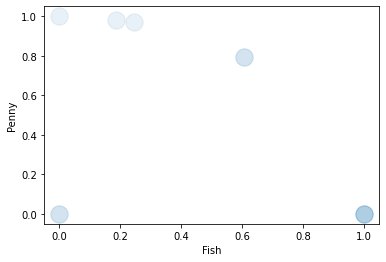

In [93]:
ax = df.plot(kind='scatter', x='fish', y='penni', alpha=0.1, s=300)
ax.set_xlabel("Fish")
ax.set_ylabel("Penny")

In [94]:
from sklearn.cluster import KMeans

number_of_clusters = 3
km = KMeans(n_clusters=number_of_clusters)
km.fit(X)
df['category'] = km.labels_

In [95]:
df

,fish,penni,category
0,0.605349,0.795961,0
1,0.000000,1.000000,0
2,1.000000,0.000000,1
3,0.245735,0.969337,0
4,1.000000,0.000000,1
5,1.000000,0.000000,1
6,0.605349,0.795961,0
7,0.186785,0.982401,0
8,0.000000,0.000000,2
9,0.000000,0.000000,2


Text(0, 0.5, 'Penny')

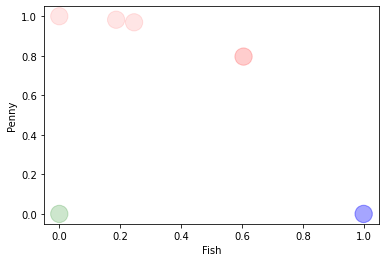

In [96]:
color_list = ['r', 'b', 'g', 'y']
colors = [color_list[i] for i in df['category']]

ax = df.plot(kind='scatter', x='fish', y='penni', alpha=0.1, s=300, c=colors)
ax.set_xlabel("Fish")
ax.set_ylabel("Penny")

In [97]:
# Initialize a vectorizer
vectorizer = TfidfVectorizer(use_idf=True, max_features=3, tokenizer=stemming_tokenizer, stop_words='english')
X = vectorizer.fit_transform(texts)

/usr/local/lib/python3.7/dist-packages/sklearn/feature_extraction/text.py:385: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['abov', 'afterward', 'alon', 'alreadi', 'alway', 'ani', 'anoth', 'anyon', 'anyth', 'anywher', 'becam', 'becaus', 'becom', 'befor', 'besid', 'cri', 'describ', 'dure', 'els', 'elsewher', 'empti', 'everi', 'everyon', 'everyth', 'everywher', 'fifti', 'formerli', 'forti', 'ha', 'henc', 'hereaft', 'herebi', 'hi', 'howev', 'hundr', 'inde', 'latterli', 'mani', 'meanwhil', 'moreov', 'mostli', 'nobodi', 'noon', 'noth', 'nowher', 'onc', 'onli', 'otherwis', 'ourselv', 'perhap', 'pleas', 'seriou', 'sever', 'sinc', 'sincer', 'sixti', 'someon', 'someth', 'sometim', 'somewher', 'themselv', 'thenc', 'thereaft', 'therebi', 'therefor', 'thi', 'thu', 'togeth', 'twelv', 'twenti', 'veri', 'wa', 'whatev', 'whenc', 'whenev', 'wherea', 'whereaft', 'wherebi', 'wherev', 'whi', 'yourselv'] not in stop_words.
  'stop_wor

In [98]:
vectorizer.get_feature_names()

['cat', 'fish', 'penni']

In [99]:
df = pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names())
df

,cat,fish,penni
0,0.000000,0.605349,0.795961
1,0.000000,0.000000,1.000000
2,0.824391,0.566020,0.000000
3,0.000000,0.245735,0.969337
4,0.000000,1.000000,0.000000
5,0.909273,0.416200,0.000000
6,0.000000,0.605349,0.795961
7,0.262506,0.180235,0.947948
8,0.000000,0.000000,0.000000
9,0.000000,0.000000,0.000000


In [100]:
from sklearn.cluster import KMeans

number_of_clusters = 4
km = KMeans(n_clusters=number_of_clusters)
km.fit(X)
df['category'] = km.labels_

In [101]:
df['text'] = texts
df

,cat,fish,penni,category,text
0,0.000000,0.605349,0.795961,0,Penny bought bright blue fishes.
1,0.000000,0.000000,1.000000,0,Penny bought bright blue and orange bowl.
2,0.824391,0.566020,0.000000,1,The cat ate a fish at the store.
3,0.000000,0.245735,0.969337,0,Penny went to the store. Penny ate a bug. Penn...
4,0.000000,1.000000,0.000000,2,"It meowed once at the bug, it is still meowing..."
5,0.909273,0.416200,0.000000,1,The cat is at the fish store. The cat is orang...
6,0.000000,0.605349,0.795961,0,Penny is a fish.
7,0.262506,0.180235,0.947948,0,Penny Penny she loves fishes Penny Penny is no...
8,0.000000,0.000000,0.000000,3,The store is closed now.
9,0.000000,0.000000,0.000000,3,How old is that tree?


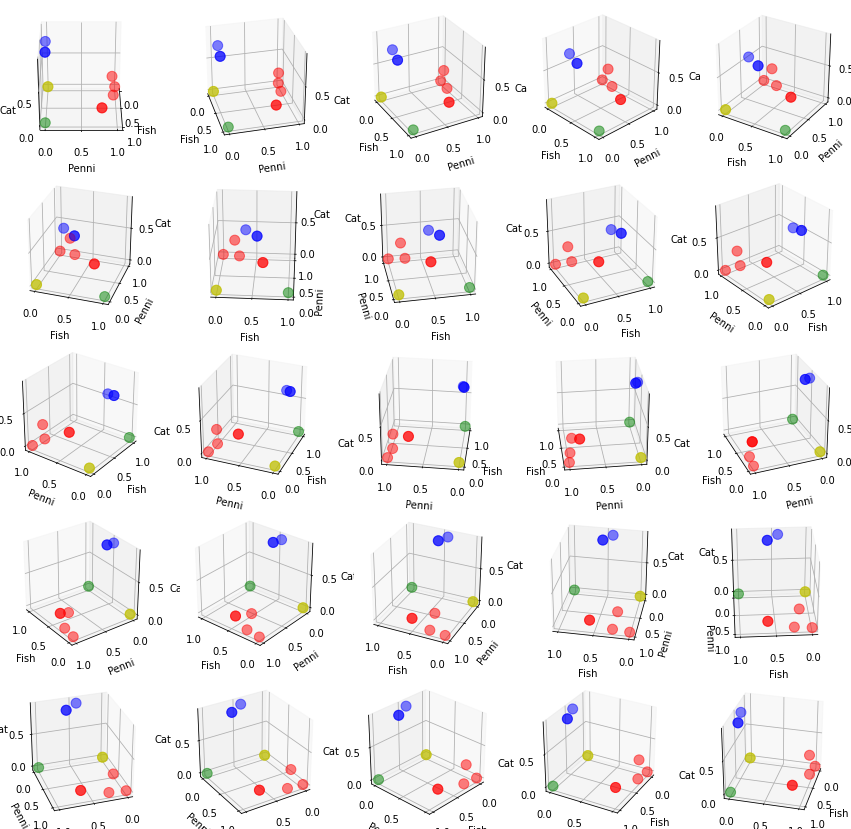

In [102]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

def draw(ax, df):
    color_list = ['r', 'b', 'g', 'y']
    colors = [color_list[i] for i in df['category']]

    marker_list = ['o', 'x', 'v', 'X']
    markers = [marker_list[i] for i in df['category']]

    ax.scatter(df['fish'], df['penni'], df['cat'], c=colors, s=100, alpha=0.5)
    ax.set_xlabel('Fish')
    ax.set_ylabel('Penni')
    ax.set_zlabel('Cat')

chart_count_vert = 5
chart_count_horiz = 5
number_of_graphs = chart_count_vert * chart_count_horiz

fig = plt.figure(figsize=(3 * chart_count_horiz, 3 * chart_count_vert))

for i in range(number_of_graphs):
    ax = fig.add_subplot(chart_count_horiz, chart_count_vert, i + 1, projection='3d', azim=(-360 / number_of_graphs) * i)
    draw(ax, df)